## PLSLDA - breast dataset

In [1]:
#disable warnings
from warnings import simplefilter, filterwarnings
simplefilter(action='ignore', category=FutureWarning)
filterwarnings("ignore")

### breast dataset

In [2]:
#alcools dataset
from discrimintools.datasets import load_dataset
D = load_dataset("breast")
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ucellsize  699 non-null    int64 
 1   normnucl   699 non-null    int64 
 2   mitoses    699 non-null    int64 
 3   Class      699 non-null    object
dtypes: int64(3), object(1)
memory usage: 22.0+ KB


In [3]:
#split into X and y
y, X = D["Class"], D.drop(columns=["Class"])

### Instanciation and training

In [4]:
#instanciation and training
from discrimintools import PLSLDA
clf = PLSLDA()
clf.fit(X,y)

,n_components,2
,scale,True
,priors,None
,classes,None
,max_iter,500
,tol,1e-10
,var_select,False
,threshold,1.0
,warn_message,True


### Canonical coefficients

In [5]:
#canonical coefficients
cancoef = clf.cancoef_
cancoef._fields

('standardized', 'raw')

#### Standardized canonical coefficients

In [6]:
#standardized canonical coefficients
print(cancoef.standardized)

               Can1      Can2
ucellsize  0.702554 -0.605737
normnucl   0.611795  0.025466
mitoses    0.363490  0.803929


#### Raw canonical coefficients

In [7]:
#raw canonical coefficients
print(cancoef.raw)

               Can1      Can2
Constant  -1.632918 -0.146717
ucellsize  0.230235 -0.198507
normnucl   0.200350  0.008340
mitoses    0.211938  0.468742


### Coefficients

In [8]:
#coefficients
coef = clf.coef_
coef._fields

('standardized', 'raw')

#### Standardized coefficients

In [9]:
#standardized coefficients
print(coef.standardized)

           negative  positive
Constant  -1.022831 -3.231980
ucellsize -1.302482  2.475256
normnucl  -0.813468  1.545927
mitoses   -0.025749  0.048934


#### Raw coefficients

In [10]:
#raw coefficients
print(coef.raw)

           negative  positive
Constant   1.102686 -7.271345
ucellsize -0.426839  0.811171
normnucl  -0.266394  0.506258
mitoses   -0.015013  0.028531


#### Summary

In [11]:
#summary
from discrimintools import summaryPLSLDA
summaryPLSLDA(clf,detailed=True)

                     Partial Least Squares Linear Discriminant Analysis - Results                     

Class Level Information:
          Frequency  Proportion  Prior Probability
negative        458      0.6552             0.6552
positive        241      0.3448             0.3448

Importance of PLS components:
      Proportion (%)  Cumulative (%)
Can1         69.1520         69.1520
Can2         20.1981         89.3501

Raw Canonical and Classification Functions Coefficients:
             Can1    Can2  negative  positive
Constant  -1.6329 -0.1467    1.1027   -7.2713
ucellsize  0.2302 -0.1985   -0.4268    0.8112
normnucl   0.2003  0.0083   -0.2664    0.5063
mitoses    0.2119  0.4687   -0.0150    0.0285

Multivariate Analysis of Variance (MANOVA) Summary:
          Statistic     Value  p-value
0     Wilks' Lambda    0.3042      NaN
1  Bartlett -- C(2)  828.2718      0.0
2   Rao -- F(2,696)  795.9566      0.0

LDA Classification functions & Statistical Evaluation:
          negative  pos

### Plotting

In [12]:
#plotting
from discrimintools import fviz_plsr

#### Graph of individuals

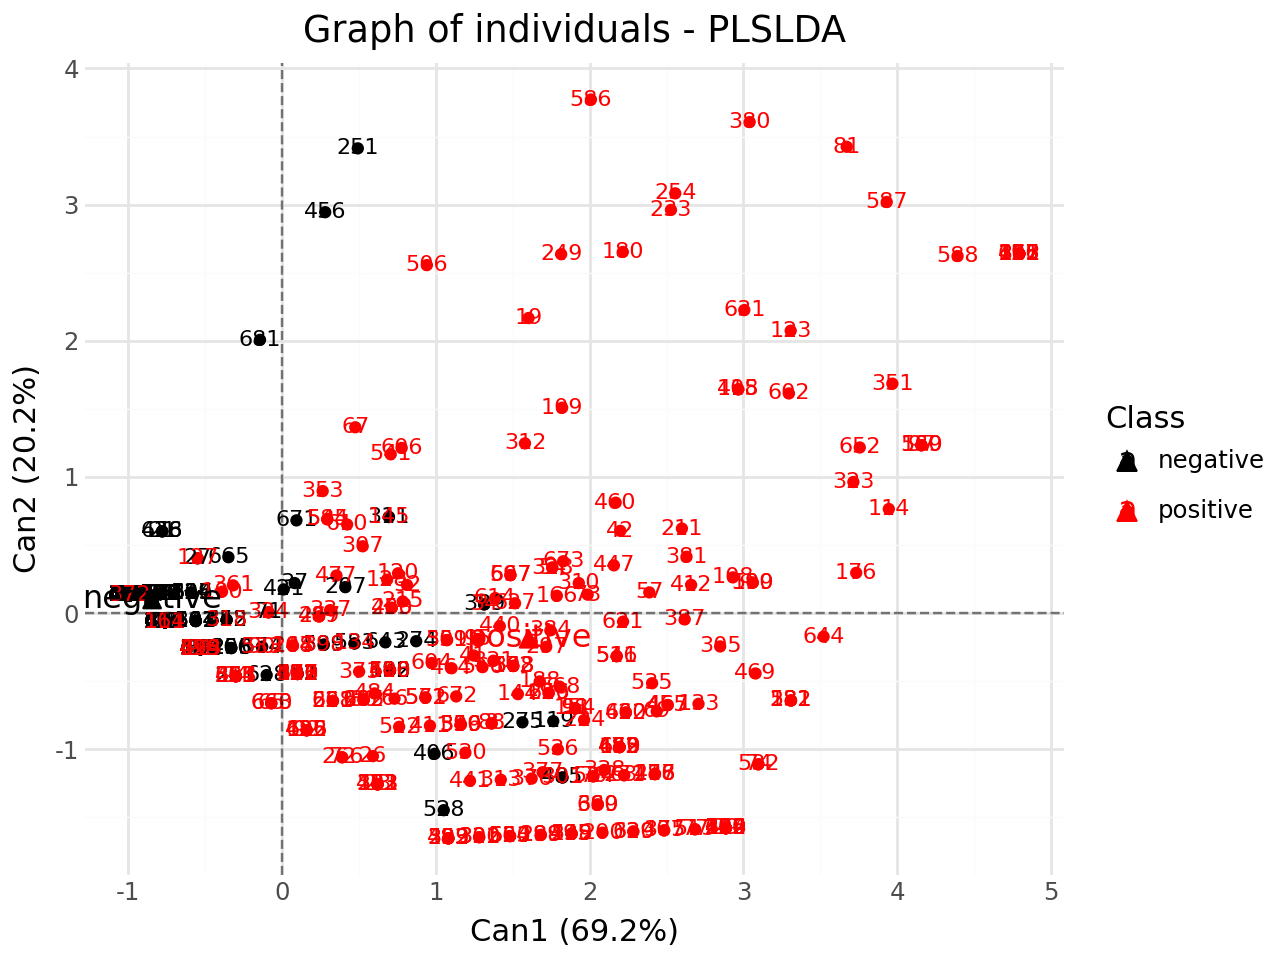

In [13]:
#graph of individuals
p = fviz_plsr(clf,element="ind",repel=False)
p.show()

#### Graph of variables

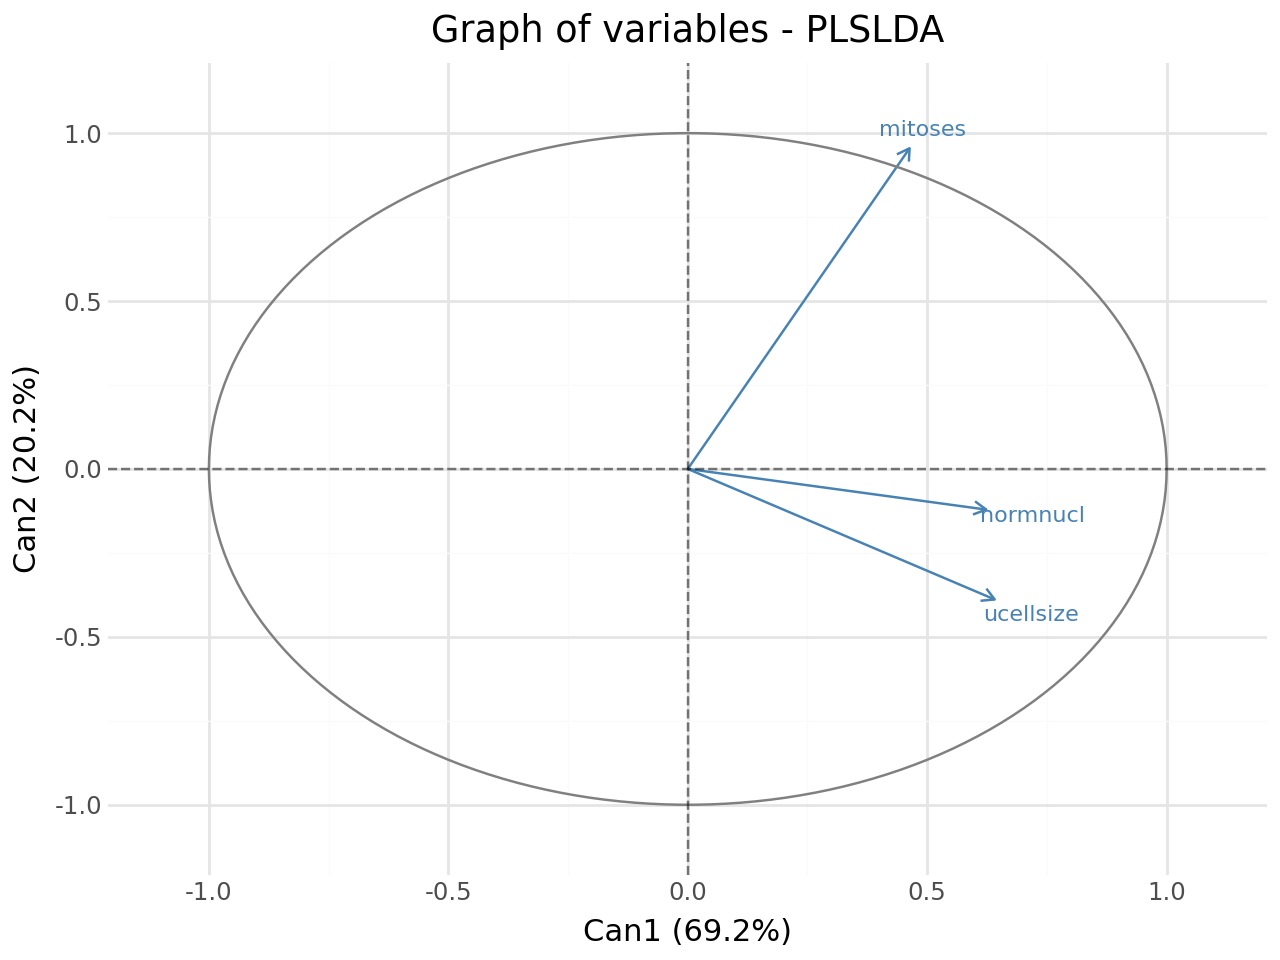

In [14]:
#graph of variables
p = fviz_plsr(clf,element="var",repel=True)
p.show()

#### Distance between barycenter

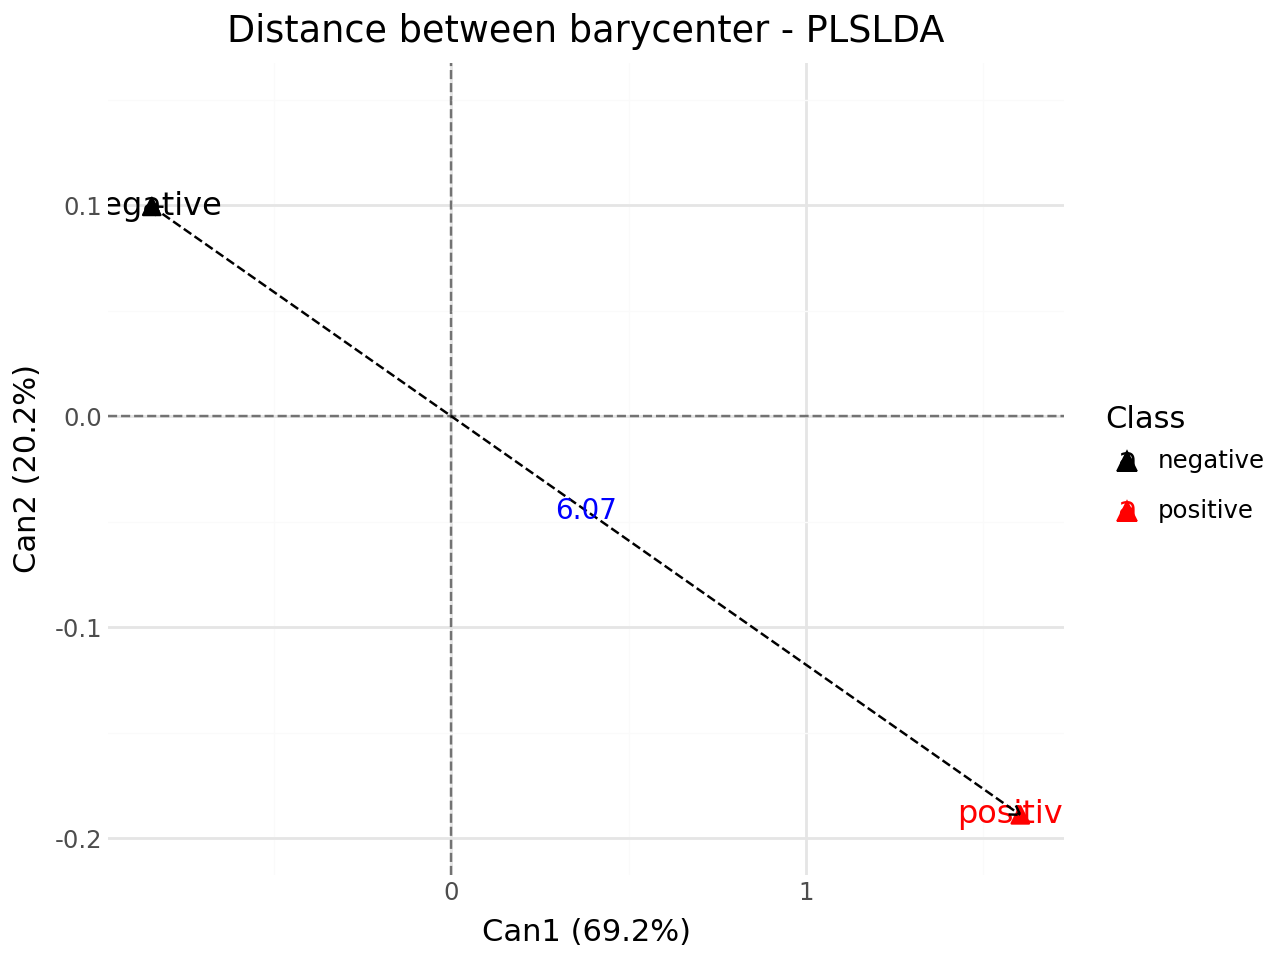

In [15]:
#distance between barycenter
p = fviz_plsr(clf,element="dist",repel=False,y_lim=(-0.2,0.15))
p.show()